<a href="https://colab.research.google.com/github/DeaAnalytics/univ-workshop/blob/main/notebooks/Python/Sesion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar numpy y pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [ ]:
#Importar los datos
RL1 = pd.read_csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/RegresionLineal_train.csv")
RL1

,peso,long
0,46,30
1,55,35
2,52,33
3,56,35
4,50,36
5,52,36
6,55,36
7,47,31
8,53,38
9,52,35


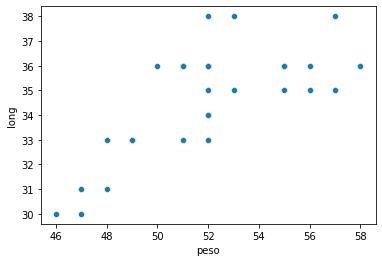

In [ ]:
sns.scatterplot(data=RL1, x="peso", y="long")
plt.show()

In [ ]:
# Crear X and y
X = RL1['peso']
y = RL1['long']
Xi = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

In [ ]:
# Note the difference in argument order
model = sm.OLS(y, Xi).fit() ## sm.OLS(output, input)
predictions = model.predict(Xi)


In [ ]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   long   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     28.71
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.17e-05
Time:                        18:53:33   Log-Likelihood:                -53.142
No. Observations:                  29   AIC:                             110.3
Df Residuals:                      27   BIC:                             113.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9793      4.794      1.873      0.072      -0.858      18.816
peso           0.4931      0.092      5.358      0.000       0.304       0.682
==============================================================================
Omnibus:                        2.229   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.921
Skew:                           0.522   Prob(JB):                        0.383
Kurtosis:                       2.293   Cond. No.                         859.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

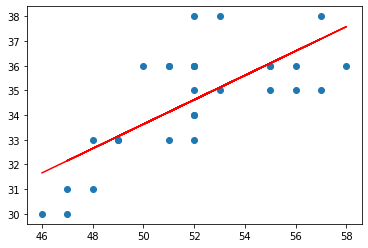

In [ ]:
plt.scatter(X, y)
plt.plot(X, 8.9793 + 0.4931*X, 'r')
plt.show()

In [ ]:

# Predicting y_value using traingn data of X
y_pred = model.predict(Xi)

# Creating residuals from the y_train data and predicted y_data
res = (y - y_pred)

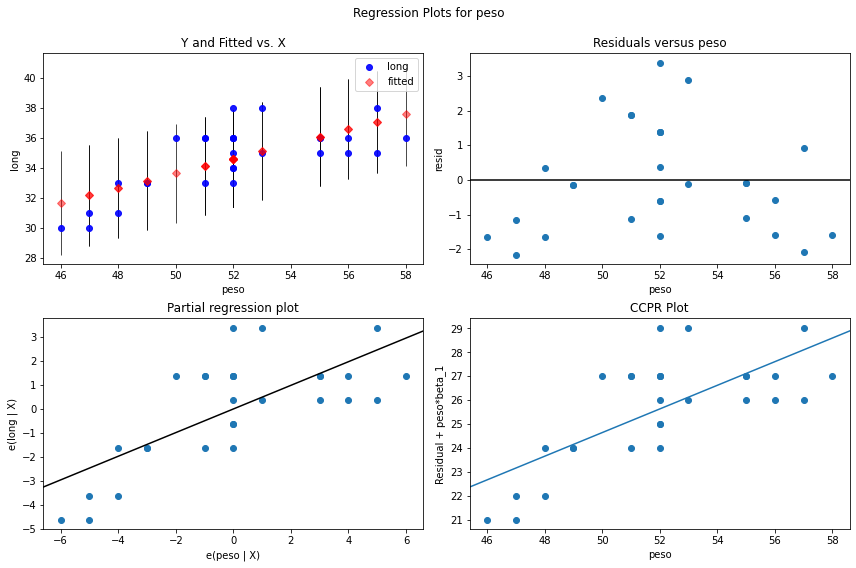

In [ ]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'peso', fig=fig)

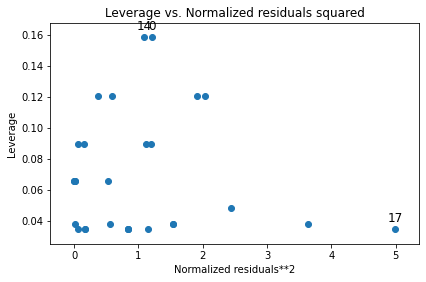

In [ ]:
fig = sm.graphics.plot_leverage_resid2(model)
fig.tight_layout(pad=1.0)

In [ ]:
#fig = sm.graphics.influence_plot(model)
#fig.tight_layout(pad=1.0)

In [ ]:
#sns.residplot(X, y)

In [ ]:
RL2 = pd.read_csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/RegresionLineal_Test.csv")
RL2

,peso,long
0,50,33
1,58,37
2,49,32
3,54,36
4,53,34
5,57,35
6,48,31
7,52,35
8,51,34
9,56,35


In [ ]:
RL2['long_estimado']=8.9793 + 0.4931*RL2['peso']
RL2

,peso,long,long_estimado
0,50,33,33.6343
1,58,37,37.5791
2,49,32,33.1412
3,54,36,35.6067
4,53,34,35.1136
5,57,35,37.0860
6,48,31,32.6481
7,52,35,34.6205
8,51,34,34.1274
9,56,35,36.5929


In [ ]:
RL3=RL2.sort_values(by=['peso'])
RL3

,peso,long,long_estimado
13,47,32,32.1550
6,48,31,32.6481
2,49,32,33.1412
0,50,33,33.6343
8,51,34,34.1274
7,52,35,34.6205
4,53,34,35.1136
3,54,36,35.6067
10,55,36,36.0998
9,56,35,36.5929


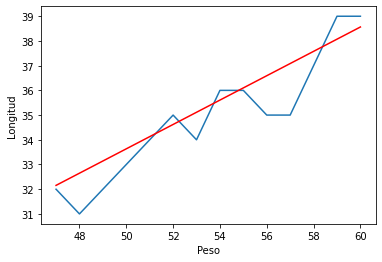

In [ ]:
p=RL3['peso']
long=RL3['long']
longe=RL3['long_estimado']
plt.plot(p, long)
plt.plot(p, longe, 'r')
plt.xlabel('Peso')
plt.ylabel('Longitud')
plt.show()

In [ ]:
RL4=RL2.drop(['peso'], axis = 1)

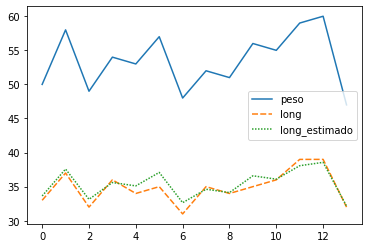

In [ ]:
sns.lineplot(data=RL2)
#plt.show()